In [10]:
# Import all packages in their own cell at the top of your notebook
import rasterio as rio
import os
import earthpy as et

In [14]:
tiff_file = os.path.join('imagery', '20190430_130801_1002_3B_AnalyticMS_SR.tif' )

In [21]:
with rio.open(tiff_file) as lidar_dem:
    print(lidar_dem.bounds)
    print(lidar_dem.tags(ns='IMAGE_STRUCTURE'))
    lidar_dem_mask = lidar_dem.dataset_mask()

BoundingBox(left=659094.0, bottom=8148549.0, right=686241.0, top=8161989.0)
{'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}


In [16]:
# View generate metadata associated with the raster file
lidar_dem.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 9049,
 'height': 4480,
 'count': 4,
 'crs': CRS.from_epsg(32722),
 'transform': Affine(3.0, 0.0, 659094.0,
        0.0, -3.0, 8161989.0)}

In [17]:
# What is the spatial resolution?
lidar_dem.res

(3.0, 3.0)

In [22]:
# View data mask
lidar_dem_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
print(lidar_dem.crs)
print(lidar_dem.bounds)

EPSG:32722
BoundingBox(left=659094.0, bottom=8148549.0, right=686241.0, top=8161989.0)


In [24]:
print(lidar_dem.count)

4


In [25]:
# How many bands / layers does the object have?
print("number of bands", lidar_dem.indexes)

number of bands (1, 2, 3, 4)


### Lesson 5. Subtract One Raster from Another and Export a New Geotiff in Python

In [29]:
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import earthpy as et
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import earthpy.spatial as es
import os
import seaborn as sns

In [30]:
plt.ion()

In [31]:
# Set plot parameters (optional)
plt.rcParams['figure.figsize'] = (8, 8)
# prettier plotting with seaborn

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [32]:
# open raster data
with rio.open(tiff_file) as lidar_dem:
    lidar_dem_im = lidar_dem.read(1, masked=True)
    # get bounds for plotting
    bounds = plotting_extent(lidar_dem)

In [33]:
with rio.open(tiff_file) as lidar_dsm:
    lidar_dsm_im = lidar_dsm.read(1, masked=True)

In [34]:
lidar_dsm_im

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0,
  dtype=uint16)

In [35]:
# are the bounds the same?
print("Is the spatial extent the same?", lidar_dem.bounds == lidar_dsm.bounds), 

Is the spatial extent the same? True


(None,)

In [36]:
## is the resolution the same ??
print("Is the resolution the same?", lidar_dem.res == lidar_dsm.res)

Is the resolution the same? True


In [37]:
# calculate canopy height model
lidar_chm_im = lidar_dsm_im - lidar_dem_im

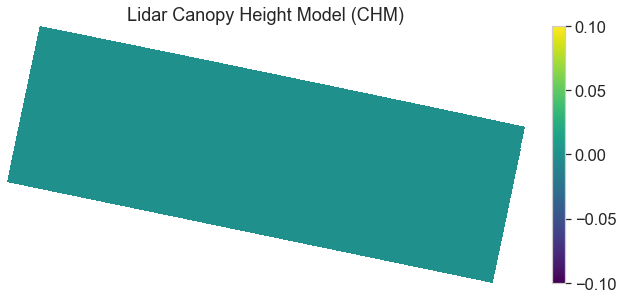

In [38]:
# plot the data
fig, ax = plt.subplots(figsize = (10,6))
chm_plot = ax.imshow(lidar_chm_im, 
                     cmap='viridis')
fig.colorbar(chm_plot, fraction=.023, ax=ax)
ax.set_title("Lidar Canopy Height Model (CHM)")
ax.set_axis_off();

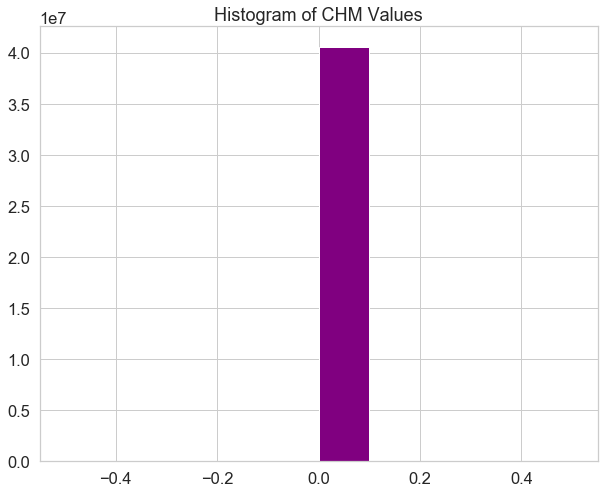

In [39]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(lidar_chm_im.ravel(), 
        color = 'purple')
ax.set_title("Histogram of CHM Values");

In [40]:
print('CHM minimum value: ', lidar_chm_im.min())
print('CHM max value: ', lidar_chm_im.max())

CHM minimum value:  0
CHM max value:  0


In [41]:
if os.path.exists('imagery/outputs'):
    print('The directory exists!')
else:
    os.makedirs('imagery/outputs')

In [42]:
lidar_dem.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 9049,
 'height': 4480,
 'count': 4,
 'crs': CRS.from_epsg(32722),
 'transform': Affine(3.0, 0.0, 659094.0,
        0.0, -3.0, 8161989.0)}

In [43]:
lidar_chm_im.min()
lidar_chm_im

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0,
  dtype=uint16)

In [44]:
# fill the masked pixels with a set no data value
nodatavalue = -999.0
lidar_chm_im_fi = np.ma.filled(lidar_chm_im, fill_value=nodatavalue)
lidar_chm_im_fi.min(), nodatavalue

(0, -999.0)

In [45]:
# update the metadata to ensure the nodata value is properly documented 

# create dictionary copy
chm_meta = lidar_dem.meta.copy()
# update the nodata value to be an easier to use number
chm_meta.update({'nodata': nodatavalue})
chm_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': -999.0,
 'width': 9049,
 'height': 4480,
 'count': 4,
 'crs': CRS.from_epsg(32722),
 'transform': Affine(3.0, 0.0, 659094.0,
        0.0, -3.0, 8161989.0)}

In [46]:
# note the width and height of the dem above. Is the numpy array shape the same?
lidar_chm_im_fi.shape

(4480, 9049)

In [47]:
out_path = "imagery/outputs/lidar_chm.tiff"
with rio.open(out_path, 'w', **chm_meta) as outf:
    outf.write(lidar_chm_im_fi, 1)

ValueError: Given nodata value, -999.0, is beyond the valid range of its data type, uint16.

### Working with Raster

In [48]:
import rasterio.warp
import rasterio.shutil

In [49]:
vrtname = 'LC08_L1TP_042034_20170616_20170629_01_T1_NDVI_OVIEW_WGS84.vrt'

In [50]:
with rasterio.open(tiff_file) as src:
    with rasterio.vrt.WarpedVRT(src, crs='epsg:4326', resampling=rasterio.enums.Resampling.bilinear) as vrt:
        rasterio.shutil.copy(vrt, vrtname, driver='VRT')


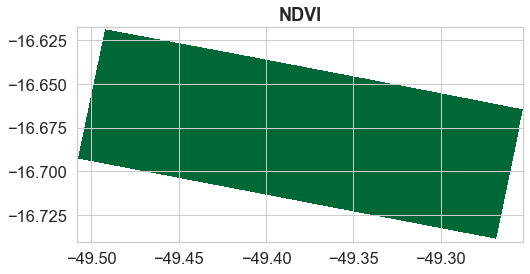

In [51]:
# Open the local warped file and plot
# NOTE our coordinates have changed to lat, lon. we should probably crop the edge artifacts do to reprojection too!
with rasterio.open(vrtname) as src:
    rasterio.plot.show(src, title='NDVI', cmap='RdYlGn', vmin=-1, vmax=1)

### Getting pixel values at single point using rasterio


In [55]:
with rasterio.drivers:
    # Read raster bands directly to Numpy arrays.
    with rasterio.open(tiff_file) as src:
        x = (src.bounds.left + src.bounds.right) / 2.0
        y = (src.bounds.bottom + src.bounds.top) / 2.0
        vals = src.sample((x, y))
        for val in vals:
            print(list(val))

AttributeError: __enter__

In [56]:
with rasterio.open(tiff_file) as src:
    x = (src.bounds.left + src.bounds.right) / 2.0
    y = (src.bounds.bottom + src.bounds.top) / 2.0
    vals = src.sample((x, y))
    for val in vals:
        print(list(val))

TypeError: cannot unpack non-iterable float object

In [59]:
with rasterio.drivers:
    pass

AttributeError: __enter__

In [60]:
import os
from subprocess import Popen,PIPE
import csv

In [84]:
sites= [
['Point1',-16.680365988829006,-49.26089002588071],
['Point2',-16.684230243309294,-49.2661471555499]
]  
# ## 'Name',Lat,Lon

In [85]:
rast = tiff_file
param = 'Raster_VALUE'
csvoutfl = 'sites.csv'

In [86]:
scr = open(csvoutfl, 'w')
header = 'site,lat,lon,{}'.format(",".join(param))

for i in sites:
    csvline = '{},{},{}'.format(i[0],i[1],i[2])
    result = os.popen("gdallocationinfo -wgs84 {0} {1} {2}".format(rast, i[2], i[1]) ).read()
    print(result)
    try:
        result = float(result)
    except ValueError:
        result = 'Err'
    csvline += ',{}'.format(result)
    scr.write('{}\n'.format(csvline))
scr.close()
print ("\n\nCREATED:  {}\n\n=== Finished ===".format(csvoutfl))

Report:
  Location: (8785P,2331L)
  Band 1:
    Value: 374
  Band 2:
    Value: 553
  Band 3:
    Value: 634
  Band 4:
    Value: 1408

Report:
  Location: (8597P,2471L)
  Band 1:
    Value: 3085
  Band 2:
    Value: 3300
  Band 3:
    Value: 3814
  Band 4:
    Value: 4135



CREATED:  sites.csv

=== Finished ===


In [78]:
!gdallocationinfo -wgs84 $tiff_file -49.26089002588071 -16.680365988829006

Report:
  Location: (8785P,2331L)
  Band 1:
    Value: 374
  Band 2:
    Value: 553
  Band 3:
    Value: 634
  Band 4:
    Value: 1408


ERROR 1: Can't load requested DLL: c:\apps\optimus\venv\lib\site-packages\osgeo\gdalplugins\ogr_FileGDB.dll
126: Não foi possível encontrar o módulo especificado.


ERROR 1: Can't load requested DLL: c:\apps\optimus\venv\lib\site-packages\osgeo\gdalplugins\ogr_FileGDB.dll
126: Não foi possível encontrar o módulo especificado.




### Exploring the Satellite Imagery:

In [87]:
import math
import rasterio
import matplotlib.pyplot as plt

In [88]:
sat_data = rasterio.open(tiff_file)

In [89]:
width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom
print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))
print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

Width: 27147.0, Height: 13440.0
Rows: 4480, Columns: 9049


In [90]:
# Upper left pixel
row_min = 0
col_min = 0
# Lower right pixel.  Rows and columns are zero indexing.
row_max = sat_data.height - 1
col_max = sat_data.width - 1
# Transform coordinates with the dataset's affine transformation.
topleft = sat_data.transform * (row_min, col_min)
botright = sat_data.transform * (row_max, col_max)
print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (659094.0, 8161989.0)
Bottom right corner coordinates: (672531.0, 8134845.0)


In [91]:
print(sat_data.count)
# sequence of band indexes
print(sat_data.indexes)

4
(1, 2, 3, 4)


In [97]:
# Load the 4 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
b, g, r, n = sat_data.read()
# Displaying the blue band.
fig = plt.imshow(g)
plt.show()

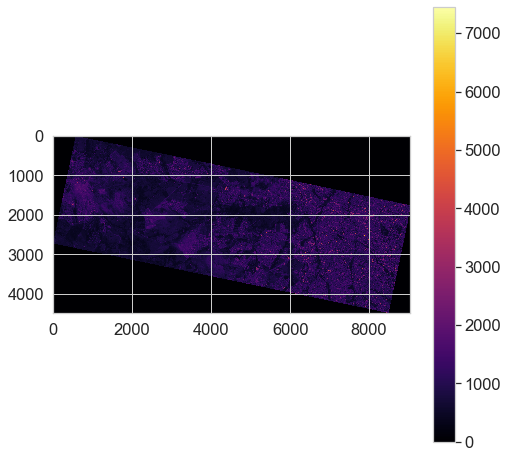

In [98]:
# Displaying the red band.
fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()
plt.show()

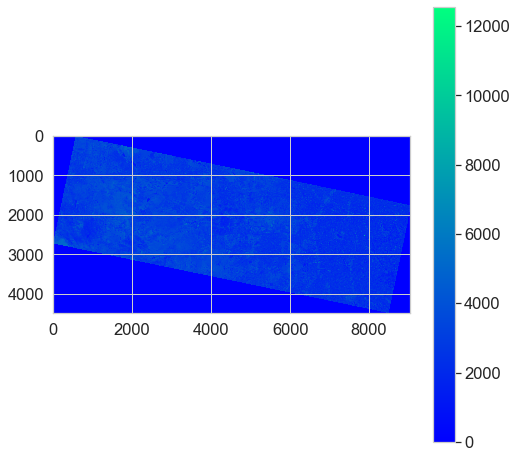

In [99]:
# Displaying the infrared band.
fig = plt.imshow(n)
fig.set_cmap('winter')
plt.colorbar()
plt.show()